# Software Engineering for Data Science

In [1]:
# Import necessary modules
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction

Software Engineering is the systematic application of scientific and technological knowledge, methods, and experience to the design, development, implementation, testing, maintenance and documentation of software.

In [1]:
# Display the Zen of Python
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Important Concepts

Some important concepts/fields of Software Engineering are as follows:

- Modularity
- Documentation
- Testing
- Maintenance
- Version Control


### PEP 8: Style Guide for Python Code

PEP stands for Python Enhancement Proposal, and there are several of them. A PEP is a document that describes new features proposed for Python and documents aspects of Python, like design and style, for the community.

[PEP 8](https://www.python.org/dev/peps/pep-0008/) is a document that provides guidelines and best practices on how to write Python code. It is essentially the _Style Guide for Python Code_. The primary focus is to improve the readability and consistency of Python code. [source](https://realpython.com/python-pep8/)

Some topics covered in the PEP 8 document are:

- Code Lay-out
    - Indentation, 
    - Tabs or Spaces?, 
    - Maximum Line Length, etc.
- String Quotes
- Whitespace in Expressions and Statements
- When to Use Trailing Commas
- Comments
- Naming Conventions
    - Overriding Principle, 
    - Descriptive: Naming Styles, 
    - Prescriptive: Naming Conventions,
    - Package and Module Names,
    - Class Names, etc.
- Programming Recommendations
    - Function Annotations,
    - Variable Annotations.

#### Check for PEP8

There are different tools to check if the code conforms to the PEP 8 guidelines. One possible way to stay compliant is to use Jupyter Notebook/Lab extension (e.g. flake8, autopep8). Another way is to use an IDE such as VS Code or PyCharm that warns the user when we stray from the style guide. We can also check code using a package such as `pycodestyle`.

In [5]:
%%writefile data/se/bad_pep8.py
# Example non-compliant code

x=2  # E225 missing whitespace around operator

if x < 5:
 x += 1  # E111 indentation is not a multiple of four

print( x  )  # 201 whitespace after '(',  E202 whitespace before ')'

Overwriting data/se/bad_pep8.py


In [6]:
%%writefile data/se/good_pep8.py
# Example PEP 8 compliant code

x = 2

if x < 5:
    x += 1

print(x)

Overwriting data/se/good_pep8.py


In [7]:
# Import necessary package
import pycodestyle

# Create a StyleGuide instance
style_checker = pycodestyle.StyleGuide()

# Run PEP 8 check on multiple files
result = style_checker.check_files(['data/se/bad_pep8.py', 
                                    'data/se/good_pep8.py'])

# Print result of PEP 8 style check
print(result.messages)

data/se/bad_pep8.py:3:2: E225 missing whitespace around operator
data/se/bad_pep8.py:6:2: E111 indentation is not a multiple of four
data/se/bad_pep8.py:8:7: E201 whitespace after '('
data/se/bad_pep8.py:8:10: E202 whitespace before ')'
{'E225': 'missing whitespace around operator', 'E111': 'indentation is not a multiple of four', 'E201': "whitespace after '('", 'E202': "whitespace before ')'"}


#### Naming Conventions

Type|Naming Convention|Examples
:---|:---|:---
Function|Lowercase word or words. Separate words by underscores to improve readability.|`function`, `my_function`
Variable|Lowercase single letter (*), word, or words. Separate words with underscores to improve readability.|`x`, `var`, `my_variable`
Class|Each word start with a capital letter. Do not separate words with underscores. This style is called camel case.|`Model`, `MyClass`
Method|Lowercase word or words. Separate words with underscores to improve readability.|`class_method`, `method`
Constant|An uppercase single letter (*), word, or words. Separate words with underscores to improve readability.|`CONSTANT`, `MY_CONSTANT`, `MY_LONG_CONSTANT`
Module|A short, lowercase word or words. Separate words with underscores to improve readability.|`module.py`, `my_module.py`
Package|A short, lowercase word or words. Do not separate words with underscores.|`package`, `mypackage`

[source](https://lemariva.com/blog/2019/05/analytics-beautiful-python-using-pep-8)

## Modularity

3 ways that to write modular code with Python are _packages_, _classes_, and _methods_.

### Packages

> Modules should have short, all-lowercase names. Underscores can be used in the module name if it improves readability. Python packages should also have short, all-lowercase names, although the use of underscores is discouraged.


The minimum requirement to make an importable python package is a directory with a blank file named `__init__.py`. Note that `__init__.py` is not required when using Python version 3.3 or above.

In [8]:
!tree my_package -L 1

my_package
├── __init__.py
├── __pycache__
├── my_subpackage
└── utils.py

2 directories, 2 files


In [29]:
# Import local package
import my_package

# View the help for the package
# help(my_package)

In [35]:
# %load my_package/__init__

In [97]:
# %load my_package/utils

In [9]:
from collections import Counter


# Create a list of colors
col = ['blue', 'red', 'blue', 'blue', 'yellow', 'blue', 'red'] 
col_count = Counter(col)

# Create a list of numbers
num = ['one', 'two', 'three', 'three', 'three', 'one'] 
num_count = Counter(num)

word_counts = [col_count, num_count]

One way to use the functions is to import directly the `utils.py` file.

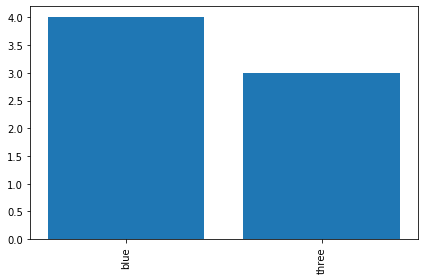

In [10]:
import my_package.utils

# Sum word_counts using sum_counters from my_package
word_count_totals = my_package.utils.sum_counters(word_counts)

# Plot word_count_totals using plot_counter from my_package
my_package.utils.plot_counter(word_count_totals)

Another way is to use `__init__.py`. Writing these functions and importing them to the package's `__init__.py` file (using relative import syntax) will let them be easily accessible by the users.

Example:
`from .utils import plot_counter, sum_counters`

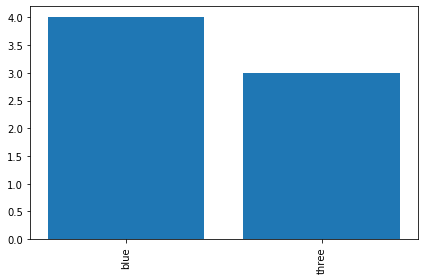

In [7]:
# Import local package
import my_package

# Sum word_counts using sum_counters from my_package
word_count_totals = my_package.sum_counters(word_counts)

# Plot word_count_totals using plot_counter from my_package
my_package.plot_counter(word_count_totals)

#### `requirements.txt`

Requirements files are lists of packages to install. Using this file, the users can easily recreate the needed environment for the package we're writing.

Requirements files give us a way to create an environment: a set of packages that work together. Instead of running something like `pip install MyApp` and getting whatever libraries come along, we can create a requirements file something like:
```
MyApp
Framework==0.9.4
Library>=0.2
```
If we save this in requirements.txt, then we can `pip install -r requirements.txt`.
[source](https://pip.readthedocs.io/en/1.1/requirements.html)

Additionally, `pip freeze` gives us the standard requirement format that may be used later with `pip install -r` to install requirements from.

In [8]:
!pip freeze > stable-req.txt

#### `setup.py`

We need to create a `setup.py` file (using a package such as `setuptools`) to make the package installable by `pip`. This step is also required to publish package to PyPi.


`install_requires` can be used to specify dependencies. For instance, when users `pip install` _my_package_, the correct version of `matplotlib` will be automatically handled by pip.

In [ ]:
# Import necessary function from setuptools
from setuptools import setup

# Create proper setup to be used by pip
setup(name='my_package',
      version='0.0.1',
      description='Perform analysis of a given text.',
      author='t k',
      packages=['my_package'],
      install_requires=['matplotlib>=3.0.0'])

Note that `requirements.txt` and `setup.py` are in the working directory, but not in the /my_package directory.

### Classes

> Class names should normally use the CapWords convention. The naming convention for functions may be used instead in cases where the interface is documented and used primarily as a callable.

`document.py`:

In [ ]:
# Define Document class
class Document:
    """A class for text analysis
    
    :param text: string of text to be analyzed
    :ivar text: string of text to be analyzed; set by `text` parameter
    """
    # Method to create a new instance of MyClass
    def Document(self, text):
        # Store text parameter to the text attribute
        self.text = text


In [ ]:
class Document:
    def __init__(self, text):
        self.text = text
        # pre tokenize the document with non-public tokenize method
        self.tokens = self._tokenize()
        # pre tokenize the document with non-public count_words
        self.word_counts = self._count_words()
    
    # non-public method to tokenize
    def _tokenize(self):
        return tokenize(self.text)

    # non-public method to tally document's word counts with Counter
    def _count_words(self):
        return Counter(self.tokens)

`__init__.py`:

In [ ]:
from .document import Document

`my_script.py`:

In [ ]:
# Import custom text_analyzer package
import text_analyzer

# Create an instance of Document with datacamp_tweet
my_document = text_analyzer.Document(text=datacamp_tweet)

# Print the text attribute of the Document instance
print(my_document.text)

#### Inheritence

In [ ]:
# Define a SocialMedia class that is a child of the `Document class`
class SocialMedia(Document):
    def __init__(self, text):
        Document.__init__(self, text)
        self.hashtag_counts = self._count_hashtags()
        self.mention_counts = self._count_mentions()
        
    def _count_hashtags(self):
        # Filter attribute so only words starting with '#' remain
        return filter_word_counts(self.word_counts, first_char='#')      
    
    def _count_mentions(self):
        # Filter attribute so only words starting with '@' remain
        return filter_word_counts(self.word_counts, first_char='@')

## Documentation

Documentation in Python can be done with **comments** or **docstrings**. Comments are not seen by the users unless they are looking into the source code. They are intended for ourselves and the collaborators. On the other hand, docstrings are documentation for the users.

### Comments

The purpose of comments is to give implementation details and make the code more readable both for ourselves and the collaborators. It is usually better to explain **why** a line of code is doing something **instead of what** obvious thing it is doing.

Comments should be complete sentences. The first word should be capitalized, unless it is an identifier that begins with a lower case letter.

#### Block Comments

Block comments generally consist of one or more paragraphs built out of complete sentences, with each sentence ending in a period. They generally apply to some (or all) code that follows them, and are indented to the same level as that code. **Paragraphs inside a block** comment are separated by a **line containing a single #**.

#### Inline Comments

An inline comment is a comment on the same line as a statement. Inline comments should be separated by **at least two spaces** from the statement.

### Docstrings (Documentation Strings)

A docstring is a string literal that occurs as the first statement in a module, function, class, or method definition. Such a docstring becomes the `__doc__` special attribute of that object. Python outputs docstrings when the user calls `help()`.

All modules should normally have docstrings, and all functions and classes exported by a module should also have docstrings. Public methods (including the `__init__` constructor) should also have docstrings. A package may be documented in the module docstring of the `__init__.py` file in the package directory.

**Module vs. Package vs. Library:**
> A module is a file containing Python definitions and statements. The file name is the module name with the suffix `.py` appended. Packages are a way of structuring Python’s module namespace by using “dotted module names”. When a module/package/something else is "published" people often refer to it as a library. Often libraries contain a package or multiple related packages, but it could be even a single module.


Docstrings are not necessary for _non-public_ methods, but we should have a comment that describes what the method does. This comment should appear after the `def` line.

[More on Docstring Conventions (PEP 257)](https://www.python.org/dev/peps/pep-0257/)

Example docstring of part of the sklearn LinearRegression class:

In [ ]:
class LinearRegression(MultiOutputMixin, RegressorMixin, LinearModel):
    """
    Ordinary least squares Linear Regression.
    
    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.
    
    Parameters
    ----------
    fit_intercept : bool, optional, default True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).
    ....

    Attributes
    ----------
    coef_ : array of shape (n_features, ) or (n_targets, n_features)
        Estimated coefficients for the linear regression problem.
        If multiple targets are passed during the fit (y 2D), this
        is a 2D array of shape (n_targets, n_features), while if only
        one target is passed, this is a 1D array of length n_features.
    ...

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.linear_model import LinearRegression
    >>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
    >>> # y = 1 * x_0 + 2 * x_1 + 3
    >>> y = np.dot(X, np.array([1, 2])) + 3
    >>> reg = LinearRegression().fit(X, y)
    >>> reg.score(X, y)
    1.0
    """
    
    # function code

> Writing docstrings that can be utilized by a documentation generator like `Sphinx` is also useful.

In [ ]:
def function(x):
    """High level description of function.
    
    Additional details on function.
    
    :param x: description of parameter x 
    :return: description of return value
    
    >>> # Example function usage
    Expected output of example function usage
    """
    
    # code

In [ ]:
# Complete the function's docstring
def tokenize(text, regex=r'[a-zA-z]+'):
    """Split text into tokens using a regular expression

    :param text: text to be tokenized
    :param regex: regular expression used to match tokens using re.findall 
    :return: a list of resulting tokens

    >>> tokenize('the rain in spain')
    ['the', 'rain', 'in', 'spain']
    """
    return re.findall(regex, text, flags=re.IGNORECASE)

# Print the docstring
help(tokenize)

### Documenting Projects

It is possible to transform docstrings into documentation in various formats including HTML and LaTeX. [Sphinx](http://www.sphinx-doc.org/en/master/) is a tool that makes it easy to create intelligent and beautiful documentation.

In [ ]:
from text_analyzer import Document

class SocialMedia(Document):
    """Analyze text data from social media
    
    :param text: social media text to analyze

    :ivar hashtag_counts: Counter object containing counts of hashtags used in text
    :ivar mention_counts: Counter object containing counts of @mentions used in text
    """
    def __init__(self, text):
        Document.__init__(self, text)
        self.hashtag_counts = self._count_hashtags()
        self.mention_counts = self._count_mentions()

## Unit Testing

Unit Testing is the first level of software testing where the smallest testable parts of a software are tested. This is used to validate that each unit of the software performs as designed. We can confirm our code is working as intended by testing.

There are many test runners available for Python. Some runners are as follows:
- [unittest](https://docs.python.org/3/library/unittest.html): The unittest unit testing framework which supports test automation, sharing of setup and shutdown code for tests, aggregation of tests into collections, and independence of the tests from the reporting framework.
- [doctest](https://docs.python.org/3/library/unittest.html): The doctest module searches for pieces of text that look like interactive Python sessions, and then executes those sessions to verify that they work exactly as shown. doctest is a simple way to minimally test the functions.
- [pytest](https://docs.pytest.org/en/latest/): The pytest framework makes it easy to write small tests, yet scales to support complex functional testing for applications and libraries. (Note that pytest only tests files who's names start or end with 'test')

### Continuous Integration (CI)

Continuous Integration is the practice of merging in small code changes frequently - rather than merging in a large change at the end of a development cycle. The goal is to build healthier software by developing and testing in smaller increments. Tools such as [Travis CI](https://travis-ci.com) can be used for this purpose.

Travis CI supports your development process by automatically building and testing code changes, providing immediate feedback on the success of the change. Travis CI can also automate other parts of your development process by managing deployments and notifications.

Some other tools useful for Software Engineering are:
- Codecov: Discover where to improve your projects tests.
- Code Climate: Analyze your code for improvements in readability/modularity.